# French industry data visualization

Jianbin Zheng

In [1]:
# import library first
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
# import data
geography = pd.read_csv("data/name_geographic_information.csv")
industry = pd.read_csv("data/base_etablissement_par_tranche_effectif.csv")
salary = pd.read_csv("data/net_salary_per_town_categories.csv")

deal with the data

In [3]:
geography.head(3)

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51


In [4]:
geography.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
EU_circo                  36840 non-null object
code_région               36840 non-null int64
nom_région                36840 non-null object
chef.lieu_région          36840 non-null object
numéro_département        36840 non-null object
nom_département           36840 non-null object
préfecture                36840 non-null object
numéro_circonscription    36840 non-null int64
nom_commune               36840 non-null object
codes_postaux             36840 non-null object
code_insee                36840 non-null int64
latitude                  33911 non-null float64
longitude                 33999 non-null object
éloignement               33878 non-null float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.9+ MB


In [5]:
industry.head(3)

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0


In [6]:
industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
CODGEO      36681 non-null object
LIBGEO      36681 non-null object
REG         36681 non-null int64
DEP         36681 non-null object
E14TST      36681 non-null int64
E14TS0ND    36681 non-null int64
E14TS1      36681 non-null int64
E14TS6      36681 non-null int64
E14TS10     36681 non-null int64
E14TS20     36681 non-null int64
E14TS50     36681 non-null int64
E14TS100    36681 non-null int64
E14TS200    36681 non-null int64
E14TS500    36681 non-null int64
dtypes: int64(11), object(3)
memory usage: 3.9+ MB


In [7]:
salary.head(3)

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6


In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5136 entries, 0 to 5135
Data columns (total 26 columns):
CODGEO       5136 non-null object
LIBGEO       5136 non-null object
SNHM14       5136 non-null float64
SNHMC14      5136 non-null float64
SNHMP14      5136 non-null float64
SNHME14      5136 non-null float64
SNHMO14      5136 non-null float64
SNHMF14      5136 non-null float64
SNHMFC14     5136 non-null float64
SNHMFP14     5136 non-null float64
SNHMFE14     5136 non-null float64
SNHMFO14     5136 non-null float64
SNHMH14      5136 non-null float64
SNHMHC14     5136 non-null float64
SNHMHP14     5136 non-null float64
SNHMHE14     5136 non-null float64
SNHMHO14     5136 non-null float64
SNHM1814     5136 non-null float64
SNHM2614     5136 non-null float64
SNHM5014     5136 non-null float64
SNHMF1814    5136 non-null float64
SNHMF2614    5136 non-null float64
SNHMF5014    5136 non-null float64
SNHMH1814    5136 non-null float64
SNHMH2614    5136 non-null float64
SNHMH5014    5136 no

In [9]:
# Only drop the necessary data we need
geography.drop(['EU_circo', 'code_région', 'éloignement', 'numéro_département', 'nom_département', 'préfecture', 'numéro_circonscription', 'codes_postaux'], axis=1, inplace=True)

In [10]:
# convert from French to English
geography.rename(columns={'nom_région': 'region_name',
                          'chef.lieu_région': 'region_capital',
                          'nom_commune': 'common_name',
                          'codes_postaux': 'postcodes'}, inplace=True)

In [11]:
geography["longitude"] = geography["longitude"].apply(lambda x: str(x).replace(',','.'))

mask = geography["longitude"] == '-'
geography.drop(geography[mask].index, inplace=True)

geography.dropna(subset = ["longitude", "latitude"], inplace=True)

geography["longitude"] = geography["longitude"].astype(float)

In [12]:

geography.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)

In [13]:
paris_lat = geography.loc[geography["common_name"] == "Paris"].iloc[0]["latitude"]
paris_lon = geography.loc[geography["common_name"] == "Paris"].iloc[0]["longitude"]

In [14]:
# introduce a new column which represent the direct distance to the centre of Paris
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    #lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

distances = []

for index, row in geography.iterrows():
    distances.append(haversine(row["longitude"], row["latitude"], paris_lon, paris_lat))

In [15]:
geography["distance"] = pd.Series(distances, index=geography.index)

In [16]:
industry = industry[industry["CODGEO"].apply(lambda x: str(x).isdigit())]

In [17]:
industry["CODGEO"] = industry["CODGEO"].astype(int)

In [18]:
industry['Micro'] = industry['E14TS1'] + industry['E14TS6']
industry['Small'] = industry['E14TS10'] + industry['E14TS20']
industry['Medium'] = industry['E14TS50'] + industry['E14TS100']
industry['Large_and_Enterprise'] = industry['E14TS200'] + industry['E14TS500']

industry['Sum'] = industry['E14TS1'] + industry['E14TS6'] + industry['E14TS10'] + industry['E14TS20'] + industry['E14TS50'] + industry['E14TS100'] + industry['E14TS200'] + industry['E14TS500']

In [19]:
industry['Micro%'] = industry['Micro'] * 100 / industry['Sum']
industry['Small%'] = industry['Small'] * 100 / industry['Sum']
industry['Medium%'] = industry['Medium'] * 100 / industry['Sum']
industry['Large_and_Enterprise%'] = industry['Large_and_Enterprise'] * 100 / industry['Sum']

In [20]:
relevant_columns = [
    'CODGEO',
    'LIBGEO', 'REG', 'DEP',
    'Sum', 'Micro', 'Small', 'Medium', 'Large_and_Enterprise',
    'Micro%', 'Small%', 'Medium%', 'Large_and_Enterprise%'
]
industry = industry[relevant_columns]

In [21]:
industry["DEP"] = industry["DEP"].astype(int)

In [22]:
salary = salary[salary["CODGEO"].apply(lambda x: str(x).isdigit())]

In [23]:
salary["CODGEO"] = salary["CODGEO"].astype(int)

In [24]:
full_data = industry.merge(geography, how="left", left_on = "CODGEO", right_on="code_insee")

In [25]:
full_data.head(3)

,CODGEO,LIBGEO,REG,DEP,Sum,Micro,Small,Medium,Large_and_Enterprise,Micro%,Small%,Medium%,Large_and_Enterprise%,region_name,region_capital,common_name,code_insee,latitude,longitude,distance
0,1001,L'Abergement-Clémenciat,82,1,3,3,0,0,0,100.000000,0.000000,0.000000,0.000000,Rhône-Alpes,Lyon,L'Abergement-Clémenciat,1001.0,46.15,4.916667,358.978958
1,1002,L'Abergement-de-Varey,82,1,1,1,0,0,0,100.000000,0.000000,0.000000,0.000000,Rhône-Alpes,Lyon,L'Abergement-de-Varey,1002.0,46.00,5.416667,394.127237
2,1004,Ambérieu-en-Bugey,82,1,419,335,70,12,2,79.952267,16.706444,2.863962,0.477327,Rhône-Alpes,Lyon,Ambérieu-en-Bugey,1004.0,45.95,5.350000,395.804017


In [26]:
# Creating DataFrame containing cities with the highiest number of workplaces
top_industry = full_data.sort_values(by=["Sum"], ascending=False).head(10)

In [27]:
# Preparing information to mark cities with highiest number of workplaces
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

In [28]:
lons = full_data["longitude"].values.tolist()
lats = full_data["latitude"].values.tolist()
size = (full_data["Sum"]/5).values.tolist()

C:\Agony\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.

C:\Agony\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



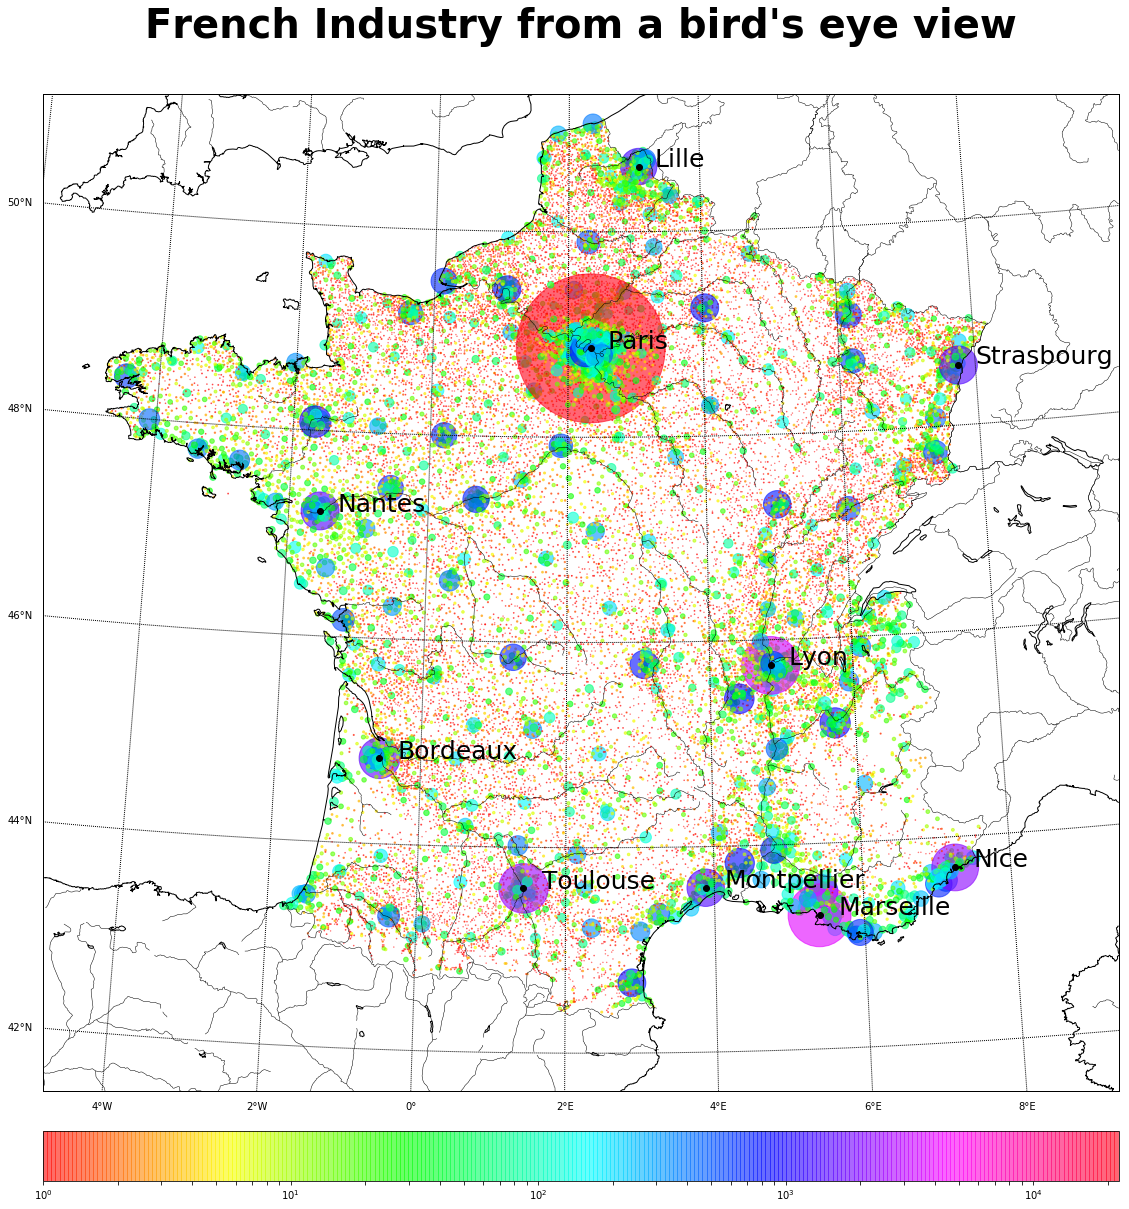

In [29]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=size, norm=colors.LogNorm(vmin=1, vmax=max(size)), cmap='hsv')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

plt.title("French Industry", fontsize=30, fontweight='bold', y=1.05)   

plt.show()

In [30]:
# Lets cut smaller cut of the map and focus on  French Riviera
lons_min = 3
lons_max = 8
lats_min = 42.5
lats_max = 45

mask_lons = (full_data["longitude"] > lons_min) & (full_data["longitude"] < lons_max)
mask_lats = (full_data["latitude"] > lats_min) & (full_data["latitude"] < lats_max)
franch_riviera = full_data[mask_lons & mask_lats]

lons = franch_riviera["longitude"].values.tolist()
lats = franch_riviera["latitude"].values.tolist()
size = (franch_riviera["Sum"]/2).values.tolist()

# Creating DataFrame containing cities with the highiest number of workplaces
top_industry = franch_riviera.sort_values(by=["Sum"], ascending=False).head(5)

# Preparing information to mark cities with highiest number of workplaces
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

C:\Agony\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.

C:\Agony\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



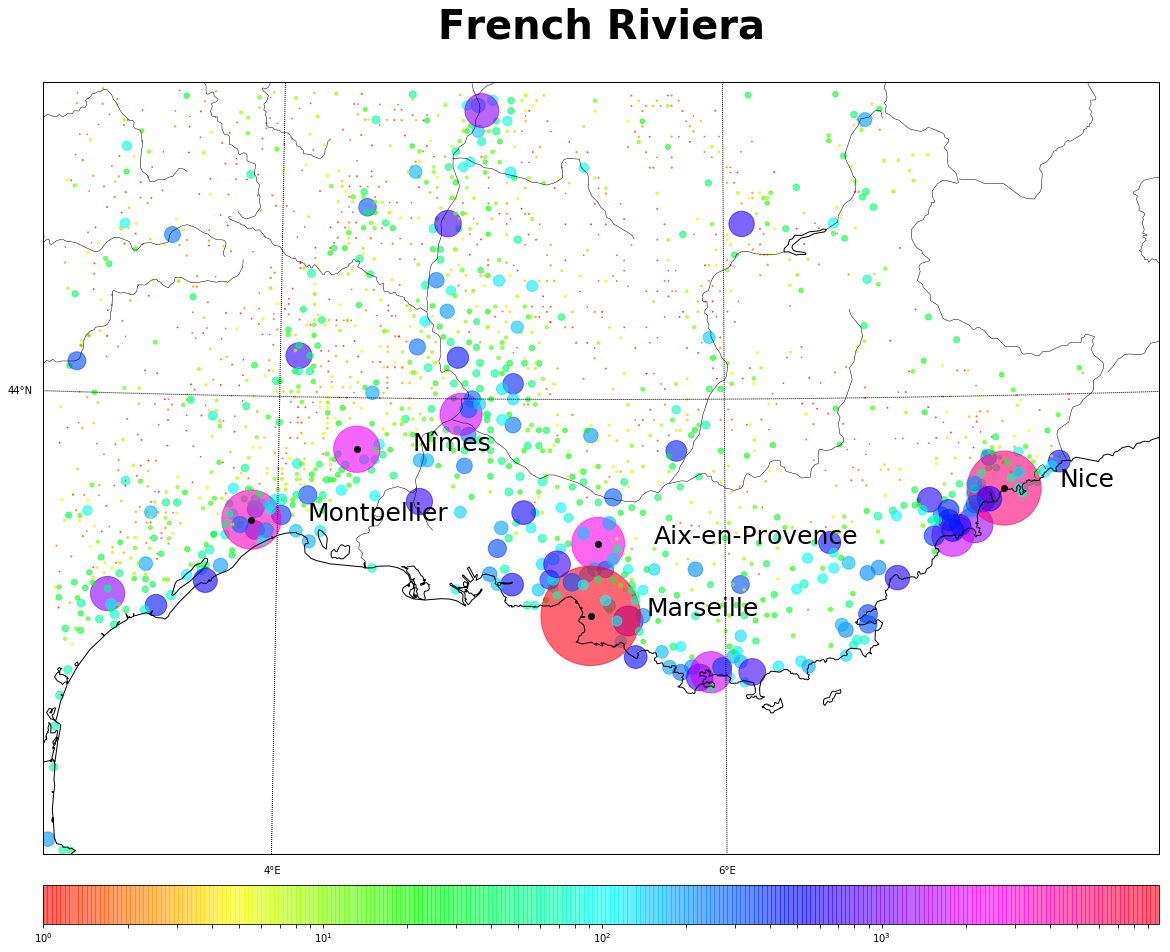

In [31]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=(lats_min + lats_max)/2,
            lon_0=(lons_min + lons_max)/2,
            resolution='h',
            llcrnrlon=lons_min, llcrnrlat=lats_min,
            urcrnrlon=lons_max, urcrnrlat=lats_max)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=size, norm=colors.LogNorm(vmin=1, vmax=max(size)), cmap='hsv')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

plt.title("French Riviera", fontsize=30, fontweight='bold', y=1.05)  

plt.show()

In [32]:
# Creating DataFrame containing cities with the highiest number of workplaces
powerhouse = full_data.sort_values(by=["Sum"], ascending=False).head(10)

In [33]:
trace1 = go.Bar(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse["Micro%"].tolist(),
    name='Micro %',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)

trace2 = go.Bar(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse["Small%"].tolist(),
    name='Small %',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Bar(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse["Medium%"].tolist(),
    name='Medium %',
    marker=dict(
        color='rgba(0, 168, 107, 0.7)',
        line=dict(
            color='rgba(0, 168, 107, 1.0)',
            width=2,
        )
    )
)

trace4 = go.Bar(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse['Large_and_Enterprise%'].tolist(),
    name='Large and Enterprise %',
    marker=dict(
        color='rgba(250, 92, 0, 0.7)',
        line=dict(
            color='rgba(250, 92, 0, 1.0)',
            width=2,
        )
    )
)

trace5 = go.Scatter(
    x = powerhouse["LIBGEO"].tolist(),
    y = powerhouse['Sum'].tolist(),
    name='Total number of businesses',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3, trace4, trace5]

layout = go.Layout(
    title = ' Pariss economic powerhouse ',
    titlefont=dict(size=25),
    width=850,
    height=600,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Percentage of total businesses per city',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Major french cities'),
    yaxis2=dict(
        title='Number of businesses per city',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 13000
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.65, y=0.45)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [34]:
regions = full_data[["region_name", "Sum"]].groupby("region_name").sum().sort_values("Sum", ascending=False).reset_index().reset_index()
regions.rename(columns={'index': 'region_rank',}, inplace=True)
regions_labels = regions["region_name"].tolist()
regions_sums = regions["Sum"].tolist()


In [35]:
trace1 = go.Bar(
    x = regions_labels,
    y = regions_sums,
    name='Number of businesses',
    marker=dict(
        color=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        colorscale='Jet',
        line=dict(
            color='rgb(0, 0, 0)',
            width=1
        )
    ),
    opacity=0.6
)

data = [trace1]

layout = go.Layout(
    barmode='stack',
    title = 'Regions with the highiest number of workplaces',
    titlefont=dict(size=25),
    width=850,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=100,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of businesses per region',
        anchor = 'x',
        rangemode='tozero'
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [36]:
by_regions = full_data.merge(regions[["region_name", "region_rank"]], how="left", on="region_name" )

In [37]:
lons = by_regions["longitude"].values.tolist()
lats = by_regions["latitude"].values.tolist()
size = (by_regions["Sum"]/5).values.tolist()
region = by_regions["region_rank"].values.tolist()


In [38]:
regions_capitals = by_regions[by_regions["region_capital"] == by_regions["common_name"]]

lons_capital = regions_capitals["longitude"].values.tolist()
lats_capital = regions_capitals["latitude"].values.tolist()
names_region = regions_capitals["region_name"].values.tolist()


C:\Agony\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.

C:\Agony\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



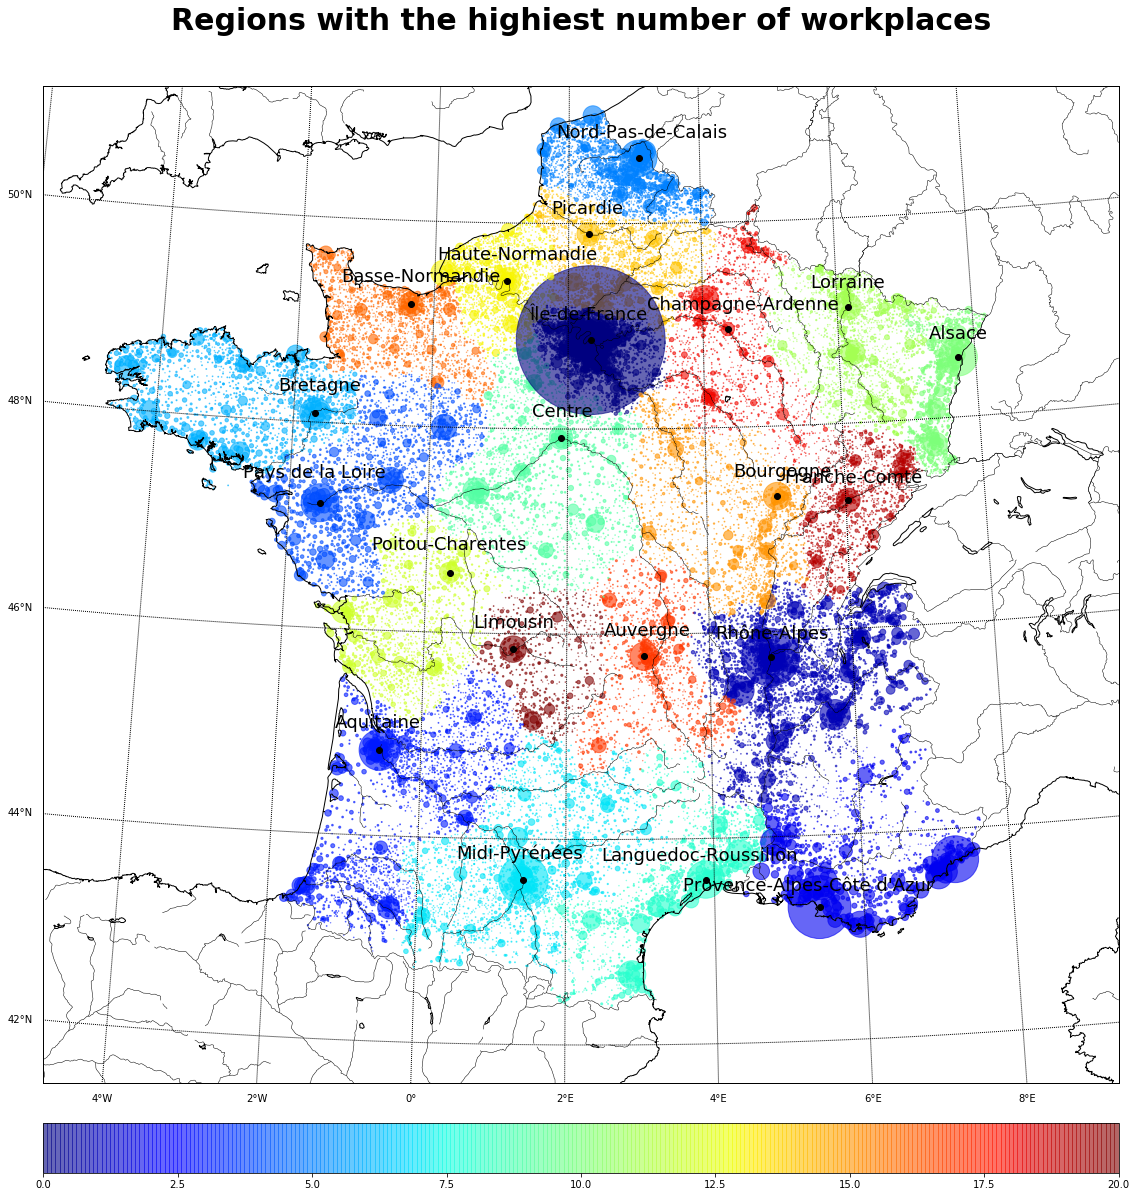

In [39]:
# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)
map.scatter(x, y, s=size, alpha=0.6, c=region, cmap='jet')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(lons_capital, lats_capital)
map.scatter(x1, y1, c="black")

for i in range(len(names_region)):
    plt.annotate(names_region[i], xy=(map(lons_capital[i] - 0.07 * len(names_region[i]),  lats_capital[i] + 0.2)), fontsize=18)

plt.title("Regions with the highiest number of workplaces", fontsize=30, fontweight='bold', y=1.05)   

plt.show()


In [40]:
positions = ["Executive", "Middle manager", "Employee", "Worker"]
woman_positions = ["SNHMFC14", "SNHMFP14", "SNHMFE14", "SNHMFO14"]
woman_salary_positions = salary[woman_positions].mean().tolist()
man_positions = ["SNHMHC14", "SNHMHP14", "SNHMHE14", "SNHMHO14"]
man_salary_positions = salary[man_positions].mean().tolist()

dif_in_prc = []
for w, m in zip(woman_salary_positions, man_salary_positions):
    dif_in_prc.append(round(abs(w-m)/m * 100, 2))

In [41]:
trace1 = go.Bar(
    x = positions,
    y = woman_salary_positions,
    name='Women',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = positions,
    y = man_salary_positions,
    name='Men',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = positions,
    y = dif_in_prc,
    name='Earnings difference',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Stereotype is real',
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Position'),
    
    yaxis2=dict(
        title='Earnings difference',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 8
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.05, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [42]:
age = ["18-25 years old", "26-50 years old", ">50 years old"]
woman_age = ["SNHMF1814", "SNHMF2614", "SNHMF5014"]
woman_salary_age = salary[woman_age].mean().tolist()
man_age = ["SNHMH1814", "SNHMH2614", "SNHMH5014"]
man_salary_age = salary[man_age].mean().tolist()

dif_in_prc_age = []
for w, m in zip(woman_salary_age, man_salary_age):
    dif_in_prc_age.append(round(abs(w-m)/m * 100, 2))


In [44]:
trace1 = go.Bar(
    x = age,
    y = woman_salary_age,
    name='Women',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = age,
    y = man_salary_age,
    name='Men',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = age,
    y = dif_in_prc_age,
    name='Earnings difference',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'Age make it even worse',
    width=850,
    height=500,
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
    xaxis = dict(title= 'Age'),
    
    yaxis2=dict(
        title='Earnings difference',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 7.3
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.72, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [46]:
salary_by_location = salary.sort_values("SNHM14", ascending=False)[["LIBGEO", "SNHM14"]]
salary_by_location.drop_duplicates("LIBGEO", inplace=True)
locations = salary_by_location["LIBGEO"].values
wage = salary_by_location["SNHM14"].values
samples = list(range(len(locations)))


In [47]:
trace1 = go.Bar(
    x = locations,
    y = wage,
    name='Wealth inequality',
    marker=dict(
        color=samples,
        colorscale='Jet',
    ),
    opacity=0.6
)

data = [trace1]

layout = go.Layout(
    barmode='stack',
    title = 'Wealth inequality',
    titlefont=dict(size=25),
    width=850,
    height=500,
    margin=go.Margin(
        l=75,
        r=20,
        b=60,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    xaxis=dict(
        title= 'Cities',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=False
    ),
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [48]:
salary_location = salary.merge(geography, how="left", left_on='CODGEO', right_on="code_insee")

In [49]:
salary_by_location = salary_location.sort_values("SNHM14", ascending=False)[["LIBGEO", "SNHM14", "distance"]]

In [50]:
top_locations = salary_by_location[salary_by_location["SNHM14"] > 30]
locations = top_locations["LIBGEO"].values
wage = top_locations["SNHM14"].values
distance = top_locations["distance"].values

In [51]:
trace1 = go.Scatter(
    x = top_locations["LIBGEO"].values,
    y = top_locations["SNHM14"].values,
    name='Mean net salary',
    mode = 'lines+markers',
)

trace2 = go.Scatter(
    x = top_locations["LIBGEO"].values,
    y = top_locations["distance"].values,
    name='Distance from the center of Paris',
    mode = 'lines+markers',
    yaxis='y2'
)

data = [trace1, trace2]

layout = go.Layout(
    title = 'Most expensive districts near Paris',
    titlefont=dict(size=25),
    width=850,
    height=600,
    margin=go.Margin(
        l=75,
        r=100,
        b=100,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
    yaxis2=dict(
        title='Distance from the center of Paris [km]',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 9.27
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.55, y=0.15)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
